In [1]:
#CNN 뇌종양 분류 모형

# glioma 신경교종

# meningioma 수막종

# notumor 뇌종양

# pituitary 뇌하수체

import os

import cv2

import tensorflow as tf

import numpy  as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical

from tensorflow.keras import layers

from sklearn.metrics import classification_report

from keras.utils import plot_model

from tensorflow import keras

import warnings

from IPython.display import HTML, display

warnings.filterwarnings("ignore")

In [2]:
def read_images(folder_path,image_size =(256,256)):
    image_list = []
    label_list = []


    for root, subdirs, files in os.walk(folder_path):
        for subdir in subdirs:
            label = subdir
            subdir_path = os.path.join(root, subdir)

            for file in os.listdir(subdir_path):
                image_path = os.path.join(subdir_path, file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                image = cv2.resize(image, image_size)
                image_list.append(image)
                label_list.append(label)

    images = np.array(image_list)
    labels = np.array(label_list)

    return images, labels

In [3]:
training_images, training_labels = read_images("c:/data/brain_mri/Training")
testing_images , testing_labels  = read_images("c:/data/brain_mri/Testing")

In [4]:
print(training_images.shape,training_labels.shape)
print(testing_images.shape ,testing_labels.shape)

(5712, 256, 256) (5712,)
(1311, 256, 256) (1311,)


iVBORw0KGgoAAAANSUhEUgAAAlgAAAJYCAYAAAC+ZpjcAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAB7OElEQVR4nO39d3xc130m/j937vSCGfROAETvIAEWSRSp3iWrWJIlWbJckji2k13vxoliJ/b6txsnazsuKydf23ES20lcJUuW1btEFZJiBUASHURvg8H0PnN/f4CECHKGBMmLKcDzfr3wIjmYOzhEm2fO+ZzPESRJkkBEREREslEkewBEREREaw0DFhEREZHMGLCIiIiIZMaARURERCQzBiwiIiIimTFgEREREcmMAYuIiIhIZgxYRERERDJjwCIiIiKSGQMWERERkcwYsIiIiIhkxoBFREREJDMGLCIiIiKZMWARERERyYwBi4iIiEhmDFhEREREMmPAIiIiIpIZAxYRERGRzBiwiIiIiGTGgEVEREQkMwYsIiIiIpkxYBERERHJjAGLiIiISGYMWEREREQyY8AiIiIikhkDFhEREZHMGLCIiIiIZMaARURERCQzBiwiIiIimTFgEREREcmMAYuIiIhIZgxYRERERDJjwCIiIiKSGQMWERERkcwYsIiIiIhkxoBFREREJDMGLCIiIiKZMWARERERyYwBi4iIiEhmDFhEREREMmPAIiIiIpIZAxYRERGRzBiwiIiIiGTGgEVEREQkMwYsIiIiIpkxYBERERHJjAGLiIiISGYMWEREREQyY8AiIiIikhkDFhEREZHMGLCIiIiIZMaARURERCQzBiwiIiIimTFgEREREcmMAYuIiIhIZgxYRERERDJjwCIiIiKSGQMWERERkcwYsIiIiIhkxoBFREREJDMGLCIiIiKZMWARERERyYwBi4iIiEhmDFhEREREMmPAIiIiIpIZAxYRERGRzBiwiIiIiGTG


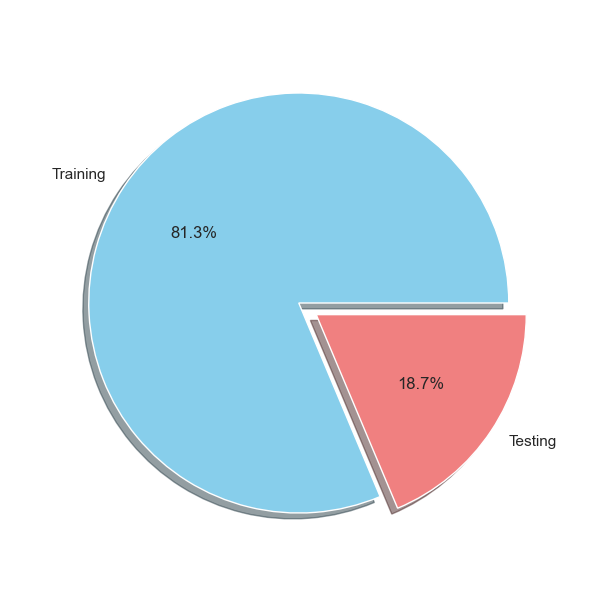

In [23]:
train_size = len(training_images)
test_size = len(testing_images)
sizes = [train_size, test_size]
labels = ['Training', 'Testing']
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.savefig('pie-00.png')
plt.close()

with open("pie-00.png", "rb") as img_file:
    img_data = img_file.read()

# base64 : 이미지를 문자형식으로 출력
import base64

img_base64 = base64.b64encode(img_data).decode("utf-8")
print(img_base64)
html_code = f'''

<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>

'''

display(HTML(html_code))


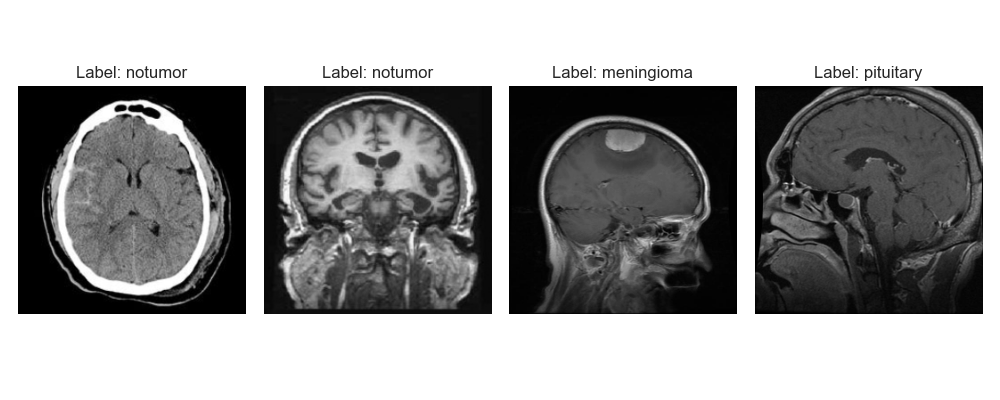

In [26]:
num_images_to_display = 4

random_indices = np.random.choice(len(training_images), size=num_images_to_display, replace=False)

fig, axes = plt.subplots(1, num_images_to_display, figsize=(10, 4))

for i, index in enumerate(random_indices):

    image = training_images[index]

    label = training_labels[index]

    axes[i].imshow(image, cmap='gray')

    axes[i].set_title(f"Label: {label}")

    axes[i].axis('off')

plt.tight_layout()

plt.savefig('output_images.png')  

plt.close()

with open("output_images.png", "rb") as img_file:

    img_data = img_file.read()

import base64

img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''

<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">

    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">

</div>

'''

display(HTML(html_code))

In [7]:
# permutation : 자료를 섞기
testing_indices = np.random.permutation(testing_images.shape[0])

testing_images = testing_images[testing_indices] / 255.0

testing_labels = testing_labels[testing_indices]

training_indices = np.random.permutation(training_images.shape[0])

training_images = training_images[training_indices] / 255.0

training_labels = training_labels[training_indices]

print(testing_images.shape, testing_labels.shape)

print(training_images.shape, training_labels.shape)

(1311, 256, 256) (1311,)
(5712, 256, 256) (5712,)


In [8]:
# 차원을 변경시켜주는 코드
train_images = np.squeeze(training_images)

train_images = np.expand_dims(train_images, axis=-1)

test_images  = np.squeeze(testing_images)

test_images  = np.expand_dims(test_images, axis=-1)

print(train_images.shape)

print(test_images.shape )

(5712, 256, 256, 1)
(1311, 256, 256, 1)


In [9]:
train_labels = np.squeeze(training_labels)

test_labels  = np.squeeze(testing_labels)

print(train_labels.shape,test_labels.shape)

(5712,) (1311,)


In [10]:
print(train_images.shape,test_images.shape)

(5712, 256, 256, 1) (1311, 256, 256, 1)


In [11]:
label_encoder        = LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_labels)

test_labels_encoded  = label_encoder.transform(test_labels)

num_classes          = len(label_encoder.classes_)

train_labels_onehot  = to_categorical(train_labels_encoded, num_classes=num_classes)

test_labels_onehot   = to_categorical(test_labels_encoded , num_classes=num_classes)

In [12]:
print(train_labels_encoded.shape)

print(test_labels_encoded.shape)

(5712,)
(1311,)


In [13]:
print(train_labels_onehot.shape)

print(test_labels_onehot.shape)

(5712, 4)
(1311, 4)


In [14]:
from tensorflow.keras.optimizers import Adam

model = tf.keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

num_labels = 4

model.add(layers.Dense(num_labels, activation='softmax'))

learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

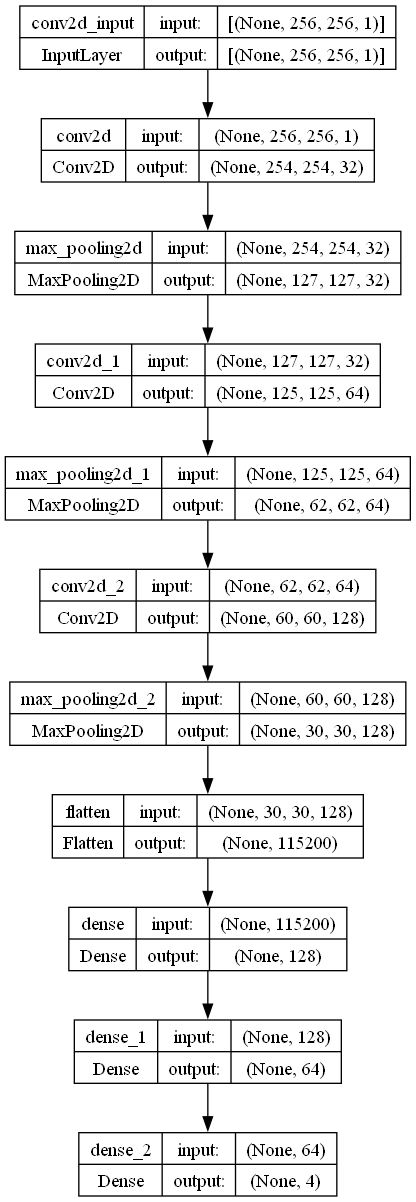

In [15]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True)


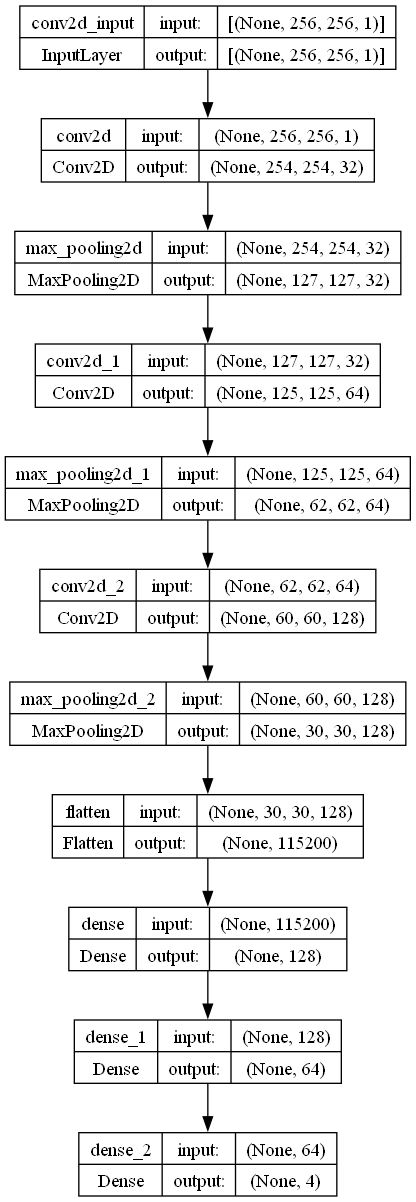

In [16]:
with open("model_plot.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''

<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>

'''

display(HTML(html_code))

In [17]:
datagen = ImageDataGenerator(
    rotation_range=10, # 회전
    width_shift_range=0.05, # 가로 쉬프트
    height_shift_range=0.05, # 세로 쉬프트
    zoom_range=0.0,
    horizontal_flip=True # 좌우 변환
)

datagen.fit(train_images)
train_generator = datagen.flow(train_images, train_labels_onehot, batch_size=32)
test_generator  = datagen.flow(test_images , test_labels_onehot , batch_size=32)

In [18]:
print("Train Generator Shape:", train_generator[0][0].shape)
print("Test  Generator Shape:", test_generator[0][0].shape)

Train Generator Shape: (32, 256, 256, 1)
Test  Generator Shape: (32, 256, 256, 1)


In [19]:
model.fit(train_generator, epochs=3, validation_data=test_generator)

Epoch 1/3
179/179 [==============================] - 198s 1s/step - loss: 0.7155 - accuracy: 0.7012 - val_loss: 0.7097 - val_accuracy: 0.7117
Epoch 2/3
179/179 [==============================] - 194s 1s/step - loss: 0.4766 - accuracy: 0.8123 - val_loss: 0.6682 - val_accuracy: 0.7437
Epoch 3/3
179/179 [==============================] - 195s 1s/step - loss: 0.4035 - accuracy: 0.8421 - val_loss: 0.4587 - val_accuracy: 0.8238



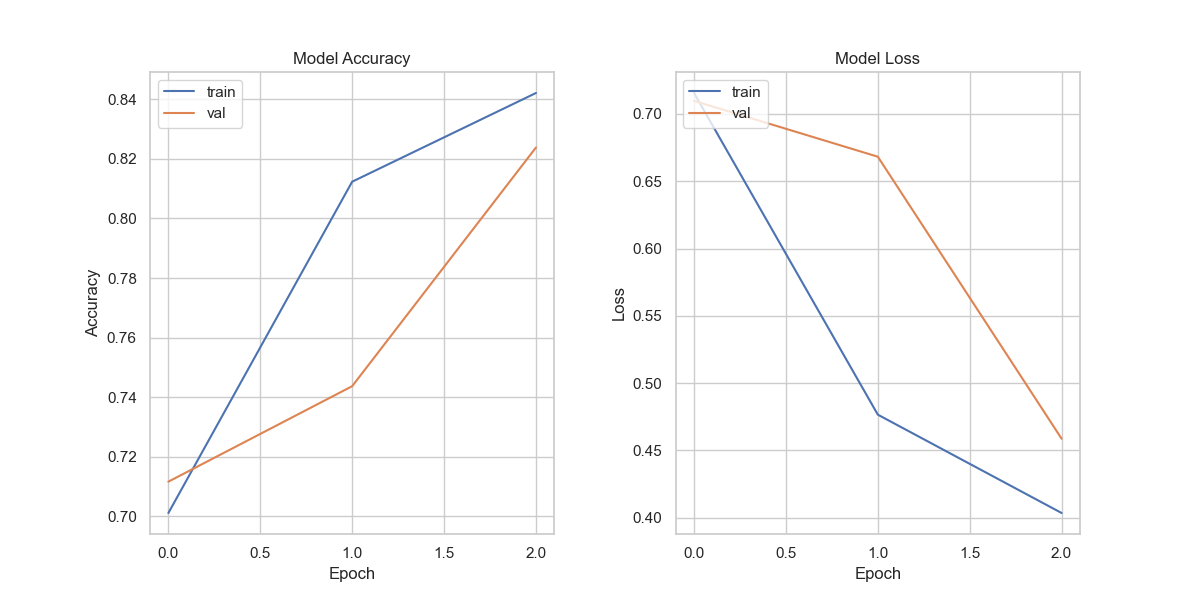

In [20]:
import matplotlib.pyplot as plt

import seaborn as sns

from IPython.display import HTML, display

import base64

sns.set(style="whitegrid")

history = model.history

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(history.history['accuracy'])

axes[0].plot(history.history['val_accuracy'])

axes[0].set_title('Model Accuracy')

axes[0].set_xlabel('Epoch')

axes[0].set_ylabel('Accuracy')

axes[0].legend(['train', 'val'], loc='upper left')

axes[1].plot(history.history['loss'])

axes[1].plot(history.history['val_loss'])

axes[1].set_title('Model Loss')

axes[1].set_xlabel('Epoch')

axes[1].set_ylabel('Loss')

axes[1].legend(['train', 'val'], loc='upper left')

plt.subplots_adjust(wspace=0.3)

plt.savefig('combined_plot.png')

plt.close()

with open("combined_plot.png", "rb") as img_file:

    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''

<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">

    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">

</div>

'''

display(HTML(html_code))

In [21]:
predictions      = model.predict(test_images)

predicted_labels = np.argmax(predictions, axis=1)

target_names     = label_encoder.classes_

print(classification_report(test_labels_encoded, predicted_labels, target_names=target_names))

41/41 [==============================] - 10s 229ms/step
              precision    recall  f1-score   support

      glioma       0.86      0.85      0.85       300
  meningioma       0.84      0.59      0.69       306
     notumor       0.86      0.96      0.91       405
   pituitary       0.86      0.99      0.92       300

    accuracy                           0.86      1311
   macro avg       0.85      0.85      0.84      1311
weighted avg       0.85      0.86      0.85      1311

